<a href="https://colab.research.google.com/github/2spoorthy/spoorthy.uber_trip_analysis/blob/main/Uber_trip_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATA**

In [ ]:
with open('/content/uber-raw-data-sep14.csv', 'r') as f:
    lines = f.readlines()
# Find all lines that contain an unterminated string
unterminated_strings = [line for line in lines if re.search(r'[^"]$', line)]
# Fix the unterminated strings by adding a closing quotation mark
for line in unterminated_strings:
    line += '"'
# Write the fixed lines back to the file
with open('/content/uber-raw-data-sep14.csv', 'w') as f:
    f.writelines(lines)

In [ ]:
data = pd.read_csv('/content/uber-raw-data-sep14.csv')

**DATA EXPLORATION**

In [ ]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
data.tail()

,Date/Time,Lat,Lon,Base
182026,9/18/2014 20:41:00,40.7543,-73.9847,B02598
182027,9/18/2014 20:41:00,40.7282,-74.0027,B02598
182028,9/18/2014 20:41:00,40.7217,-73.9975,B02598
182029,9/18/2014 20:41:00,40.7265,-74.0090,B02598
182030,9/18/2014 20:41:00,40.0000,NaN,NaN


In [ ]:
data.shape

(182031, 4)

In [ ]:
data.size

728124

In [ ]:
data.describe()

,Lat,Lon
count,182031.000000,182030.000000
mean,40.739755,-73.972900
std,0.040693,0.061551
min,40.000000,-74.773600
25%,40.721500,-73.997100
50%,40.742800,-73.983700
75%,40.761400,-73.965400
max,41.224600,-72.716300


In [ ]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [ ]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182031 entries, 0 to 182030
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  182031 non-null  object 
 1   Lat        182031 non-null  float64
 2   Lon        182030 non-null  float64
 3   Base       182030 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.6+ MB


In [ ]:
data.index

RangeIndex(start=0, stop=182031, step=1)

In [ ]:
data.loc[0]

Date/Time    9/1/2014 0:01:00
Lat                   40.2201
Lon                  -74.0021
Base                   B02512
Name: 0, dtype: object

In [ ]:
data.iloc[0]

Date/Time    9/1/2014 0:01:00
Lat                   40.2201
Lon                  -74.0021
Base                   B02512
Name: 0, dtype: object

In [ ]:
data.isnull()

,Date/Time,Lat,Lon,Base
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
182026,False,False,False,False
182027,False,False,False,False
182028,False,False,False,False
182029,False,False,False,False


In [ ]:
data.dropna()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
182025,9/18/2014 20:41:00,40.7254,-74.0038,B02598
182026,9/18/2014 20:41:00,40.7543,-73.9847,B02598
182027,9/18/2014 20:41:00,40.7282,-74.0027,B02598
182028,9/18/2014 20:41:00,40.7217,-73.9975,B02598


**DATA ANALYSIS**

In [ ]:
#Change the "Date/Time" column's data type from string to datetime
data['Date/Time']= pd.to_datetime(data['Date/Time'])
#Convert "Date/Time" column from string data type into DateTime
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


IDENTIFYING PEAK RIDE HOURS

In [ ]:
peak_hours = data['Hour'].value_counts().sort_values(ascending=False).head(5)
print(f"Peak ride hours: {peak_hours.index.tolist()}")

Peak ride hours: [18, 17, 16, 19, 15]


POPULAR PICKUP LOCATIONS

In [ ]:
# Extract latitude and longitude columns
latitude = data["Lat"]
longitude = data["Lon"]
# Combine latitude and longitude into a single tuple
pickup_coordinates = list(zip(latitude, longitude))
pickup_coordinates

[(40.2201, -74.0021),
 (40.75, -74.0027),
 (40.7559, -73.9864),
 (40.745, -73.9889),
 (40.8145, -73.9444),
 (40.6735, -73.9918),
 (40.7471, -73.6472),
 (40.6613, -74.2691),
 (40.3745, -73.9999),
 (40.7633, -73.9773),
 (40.7467, -73.6131),
 (40.8105, -73.96),
 (40.679, -74.0111),
 (40.4023, -73.9839),
 (40.7378, -74.0395),
 (40.7214, -73.9884),
 (40.8646, -73.9081),
 (40.7398, -74.0061),
 (40.6793, -74.0116),
 (40.7328, -73.9875),
 (40.6743, -73.9334),
 (40.7638, -73.9962),
 (40.7638, -73.9811),
 (40.7415, -73.9975),
 (40.7445, -73.9855),
 (40.6614, -73.9409),
 (40.7494, -73.9946),
 (40.7529, -74.004),
 (41.0319, -74.1813),
 (40.7983, -73.9628),
 (40.6932, -73.943),
 (40.707, -74.0045),
 (40.7193, -73.9998),
 (40.7608, -73.9859),
 (40.8293, -73.9432),
 (40.7612, -73.9874),
 (40.7215, -73.9841),
 (40.7778, -73.9888),
 (40.7501, -74.0025),
 (40.7769, -73.9862),
 (40.7499, -73.9717),
 (40.7513, -73.935),
 (40.7291, -73.9813),
 (40.7674, -73.9841),
 (40.7414, -73.9983),
 (40.7685, -73.8626)

In [ ]:
# Count the occurrences of each unique coordinate
coordinate_counts = {}
for coordinate in pickup_coordinates:
    if coordinate not in coordinate_counts:
        coordinate_counts[coordinate] = 0
    coordinate_counts[coordinate] += 1

In [ ]:
# Sort the coordinates by their count in descending order
popular_coordinates = sorted(coordinate_counts.items(), key=lambda item: item[1], reverse=True)
print("Top 5 Pickup Coordinates:")
print(popular_coordinates[:5])

Top 5 Pickup Coordinates:
[((40.6448, -73.782), 128), ((40.6448, -73.7819), 122), ((40.6448, -73.7818), 102), ((40.774, -73.8726), 95), ((40.7685, -73.8625), 88)]


DISTRIBUTION OF RIDE DURATION

In [ ]:
# Calculate the duration of each ride in nano seconds
data["Ride_Duration"] = data["Date/Time"].diff()
data["Ride_Duration"].head()

0               NaT
1   0 days 00:00:00
2   0 days 00:02:00
3   0 days 00:03:00
4   0 days 00:05:00
Name: Ride_Duration, dtype: timedelta64[ns]

In [ ]:
# Convert the duration to minutes
data["Ride_Duration"] = data["Ride_Duration"] / pd.Timedelta("1 minute")
data["Ride_Duration"].head()

0    NaN
1    0.0
2    2.0
3    3.0
4    5.0
Name: Ride_Duration, dtype: float64

RIDE COUNTS BY HOUR

In [ ]:
# Group the data by hour
grouped_data = data.groupby("Hour")
# Count the number of rides in each hour using Lat and Lon columns
ride_counts = grouped_data["Lat"].count() + grouped_data["Lon"].count()
ride_counts.head()

Hour
0    7262
1    4324
2    2862
3    3324
4    4238
dtype: int64

RIDE COUNTS BY WEEKDAYS

In [ ]:
# Group the data by weekdays
grouped_data = data.groupby("Weekday")
# Count the number of rides in each hour using Lat and Lon columns
ride_counts = grouped_data["Lat"].count() + grouped_data["Lon"].count()
ride_counts.head()

Weekday
0    47172
1    59264
2    59576
3    62643
4    50516
dtype: int64

RIDE COUNTS BY LONGITUDE

In [ ]:
# Group the data by LON
grouped_data = data.groupby("Lon")
# Count the number of rides in each hour using Lat and Lon columns
ride_counts = grouped_data["Lat"].count() + grouped_data["Lon"].count()
ride_counts.head()

Lon
-74.7736    2
-74.6772    2
-74.6659    2
-74.6624    2
-74.6618    2
dtype: int64

RIDE COUNTS BY LATITUDE

In [ ]:
# Group the data by LAT
grouped_data = data.groupby("Lat")
# Count the number of rides in each hour using Lat and Lon columns
ride_counts = grouped_data["Lat"].count() + grouped_data["Lon"].count()
ride_counts.head()

Lat
40.0000    1
40.1702    2
40.1760    2
40.2052    4
40.2170    2
dtype: int64

**DATA VISUALISATION**

Text(0, 0.5, 'Density of rides')

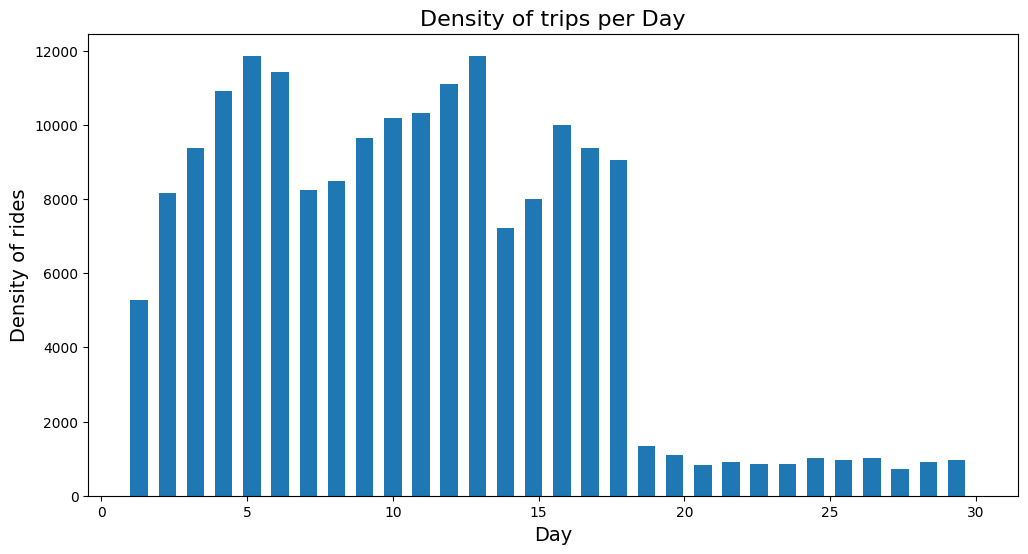

In [ ]:
#Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(data.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Text(0, 0.5, 'Density of rides')

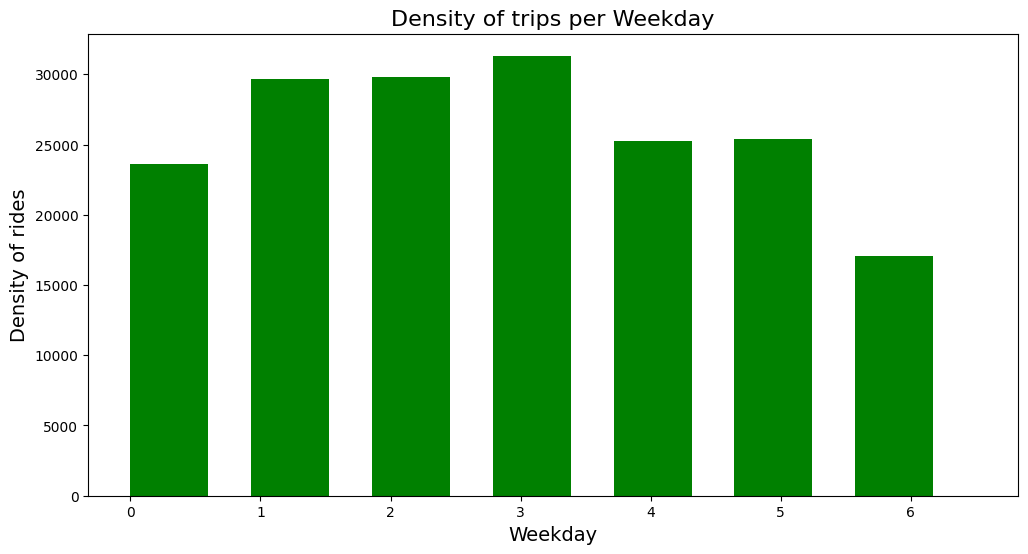

In [ ]:
#Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(data.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Text(0, 0.5, 'Density of rides')

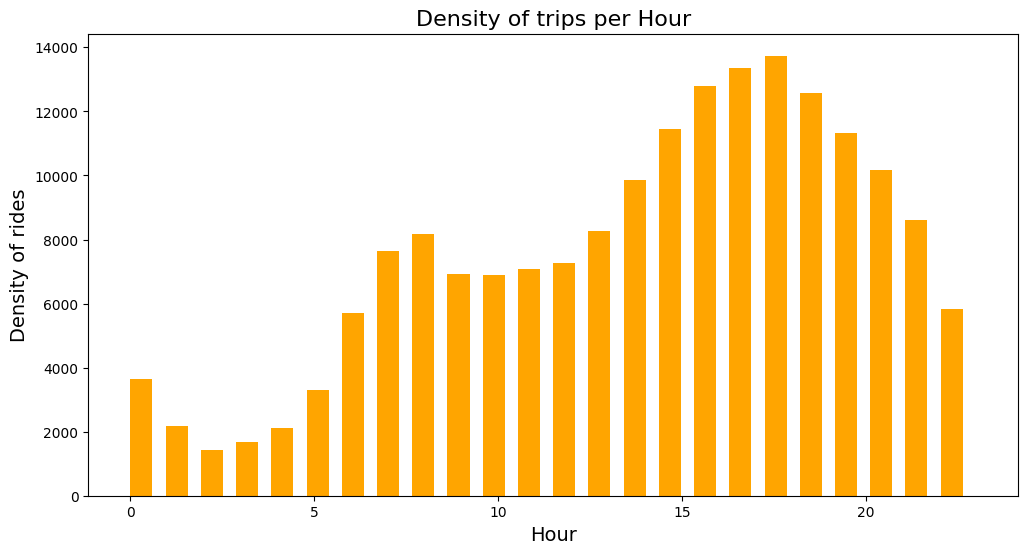

In [ ]:
#Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(data.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Text(0, 0.5, 'Density of rides')

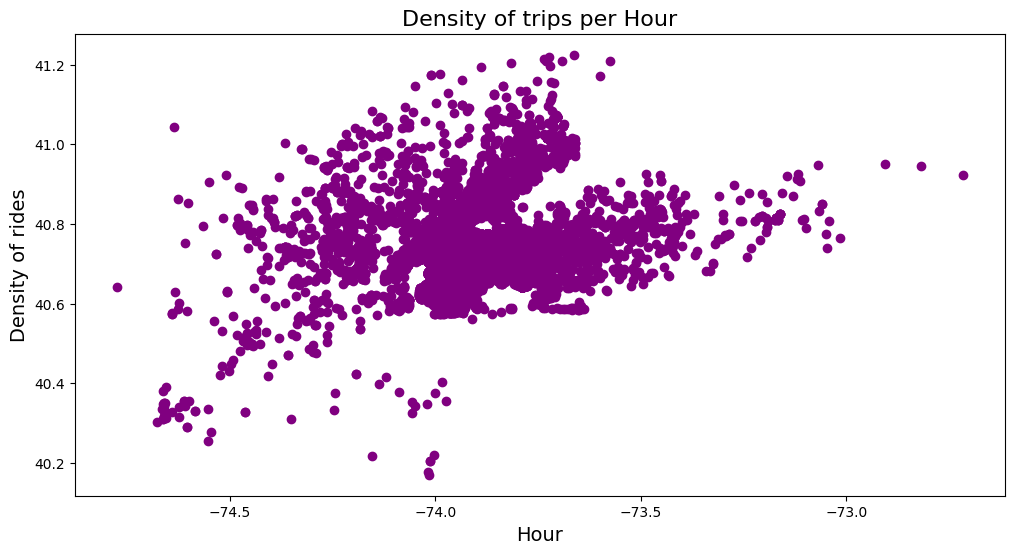

In [ ]:
#Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= data.Lon
y= data.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

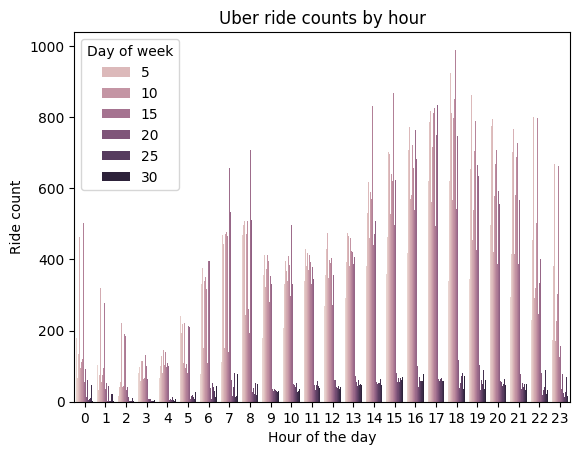

In [ ]:
#Ride counts by hour
sns.countplot(data=data,x='Hour',hue='Day')
plt.title('Uber ride counts by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Ride count')
plt.legend(title='Day of week')
plt.show()

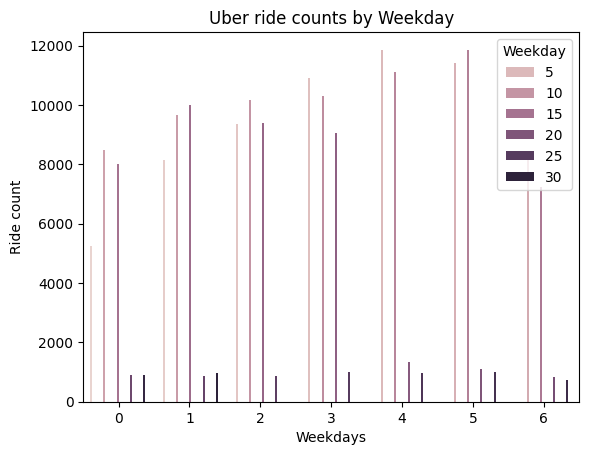

In [ ]:
#Ride counts by Weekday
sns.countplot(data=data,x='Weekday',hue='Day')
plt.title('Uber ride counts by Weekday')
plt.xlabel('Weekdays')
plt.ylabel('Ride count')
plt.legend(title='Weekday')
plt.show()

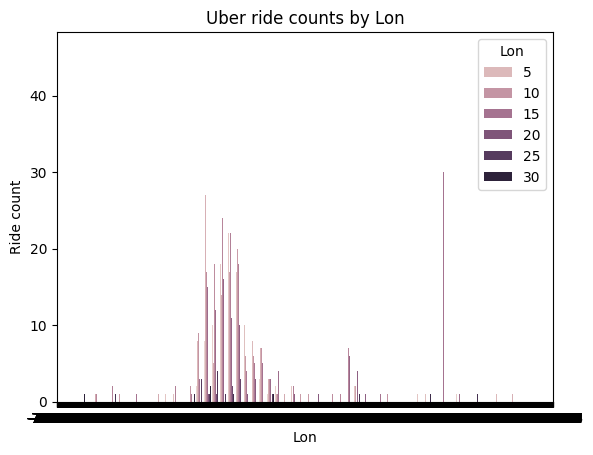

In [ ]:
#Ride counts by Longitude
sns.countplot(data=data,x='Lon',hue='Day')
plt.title('Uber ride counts by Lon')
plt.xlabel('Lon')
plt.ylabel('Ride count')
plt.legend(title='Lon')
plt.show()

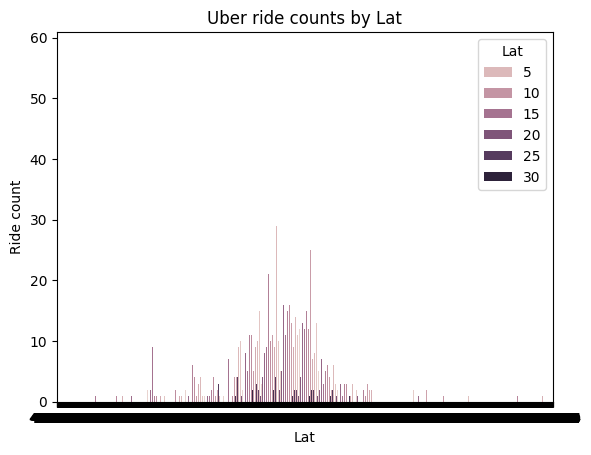

In [ ]:
#Ride counts by Latitude
sns.countplot(data=data,x='Lat',hue='Day')
plt.title('Uber ride counts by Lat')
plt.xlabel('Lat')
plt.ylabel('Ride count')
plt.legend(title='Lat')
plt.show()